In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

X_test = pd.read_pickle("../data/X_test_clean.pkl")
X_train = pd.read_pickle("../data/X_train_clean.pkl")
y_train = pd.read_pickle("../data/y_train.pkl")

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(8492, 9)
(8492, 1)
(3453, 9)


Répartition des classes dans y_train :
prdtypecode
10             314
40             275
50             181
60              84
1140           264
1160           391
1180            72
1280           458
1281           222
1300           492
1301            91
1302           241
1320           336
1560           504
1920           420
1940            69
2060           550
2220            88
2280           471
2403           483
2462           150
2522           491
2582           210
2583           965
2585           293
2705           277
2905           100
Name: count, dtype: int64


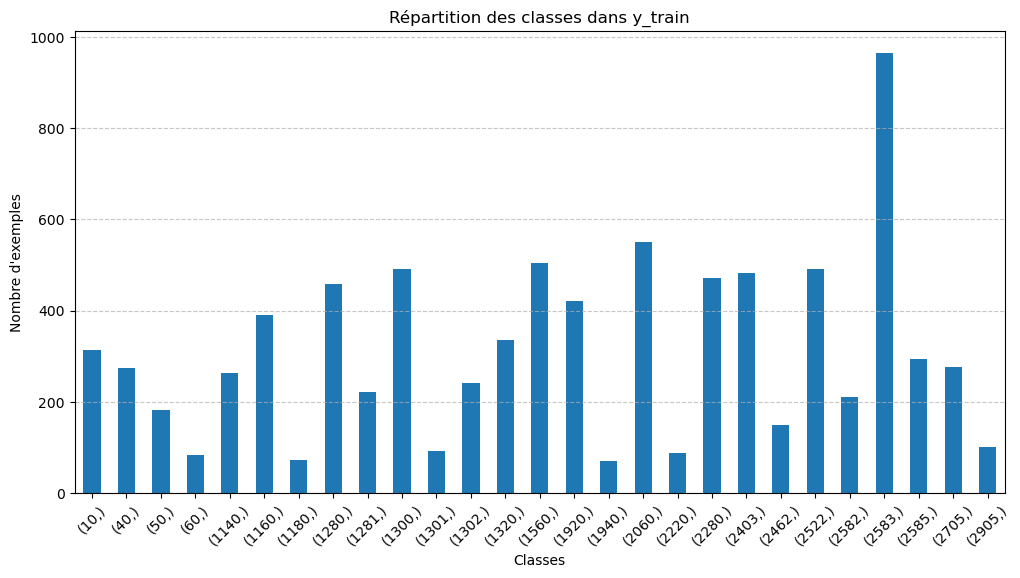

In [2]:
# Afficher la répartition des classes dans y_train
class_distribution = y_train.value_counts().sort_index()

# Afficher la table des distributions
print("Répartition des classes dans y_train :")
print(class_distribution)

# Visualisation avec un histogramme
plt.figure(figsize=(12, 6))
class_distribution.plot(kind='bar')
plt.title("Répartition des classes dans y_train")
plt.xlabel("Classes")
plt.ylabel("Nombre d'exemples")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [3]:
X_train.head()

,designation,description,productid,imageid,designation_description,language_langid,designation_description_fr,designation_description_fr_lemmatized,designation_description_fr_cleaned
36138,Nk Pro Racing - Jeu En Téléchargement,<strong>À PROPOS DU JEU</strong> <b>NKPro Rac...,1711734527,1100082580,Nk Pro Racing - Jeu En Téléchargement,fr,Nk Pro Racing - Jeu En Téléchargement,nk pro Racing - Jeu en téléchargement,nk pro Racing Jeu téléchargement
68630,Exit - Tombeau Du Pharaon,"<div class=""rte""><p>EXIT est un jeu qui repren...",2397542298,1139624392,Exit - Tombeau Du Pharaon,fr,Exit - Tombeau Du Pharaon,exit - tombeau de Pharaon,exit tombeau Pharaon
36172,Bricolage Lettres En Mousse D'argent Alphabet ...,Bricolage lettres en mousse d&#39;argent Alpha...,3979577549,1271697301,Bricolage Lettres En Mousse D'argent Alphabet ...,fr,Bricolage Lettres En Mousse D'argent Alphabet ...,Bricolage Lettres en mousse de argent alphabet...,Bricolage Lettres mousse argent alphabet Autoc...
9830,Nostalgique Fer Blanc Clockwork Chaîne Jouet P...,Nostalgique fer blanc Clockwork chaîne Jouet P...,4197657726,1313204688,Nostalgique Fer Blanc Clockwork Chaîne Jouet P...,fr,Nostalgique Fer Blanc Clockwork Chaîne Jouet P...,nostalgique Fer blanc Clockwork chaîne Jouet p...,nostalgique Fer blanc Clockwork chaîne Jouet p...
28422,Le Courrier De L'unesco Mai 1996 N° 9605 : Le...,NaN,52594358,518749844,Le Courrier De L'unesco Mai 1996 N° 9605 : Le...,fr,Le Courrier De L'unesco Mai 1996 N° 9605 : Le...,le courrier de le unesco mai 1996 n degré 96...,courrier unesco mai 1996 n degré 9605 Silence


In [4]:
y_train.head()

,prdtypecode
36138,2905
68630,1281
36172,2060
9830,1280
28422,2280


In [5]:
merged_df = X_train.join(y_train)

# Renommer la colonne 'prdtypecode' en 'target'
merged_df = merged_df.rename(columns={'prdtypecode': 'target'})

merged_df = merged_df[['target','designation_description_fr_cleaned']]

merged_df.head()

,target,designation_description_fr_cleaned
36138,2905,nk pro Racing Jeu téléchargement
68630,1281,exit tombeau Pharaon
36172,2060,Bricolage Lettres mousse argent alphabet Autoc...
9830,1280,nostalgique Fer blanc Clockwork chaîne Jouet p...
28422,2280,courrier unesco mai 1996 n degré 9605 Silence


In [6]:
# Suppression des lignes avec des NaN ou des chaînes vides dans 'designation_description_fr_cleaned'
merged_df_cleaned = merged_df.dropna(subset=['designation_description_fr_cleaned'])  # Supprime les NaN
merged_df_cleaned = merged_df_cleaned[merged_df_cleaned['designation_description_fr_cleaned'].str.strip() != ""]  # Supprime les chaînes vides

# Vérification
print("Taille initiale du DataFrame :", merged_df.shape[0])
print("Taille après suppression des lignes vides :", merged_df_cleaned.shape[0])

# Réinitialiser les index après suppression
merged_df_cleaned = merged_df_cleaned.reset_index(drop=True)

# Split des données propres
X = merged_df_cleaned['designation_description_fr_cleaned']
y = merged_df_cleaned['target']


Taille initiale du DataFrame : 8492
Taille après suppression des lignes vides : 8489


In [7]:
# Étape 1 : Extraire 10% pour le test final
X_final_test, X_rest, y_final_test, y_rest = train_test_split(
    merged_df['designation_description_fr_cleaned'], 
    merged_df['target'], 
    test_size=0.90,  # Ici, 10% pour le test final
    random_state=42, 
    stratify=merged_df['target']  # Maintenir la distribution des classes
)

print("Taille du jeu de test final :", X_final_test.shape)
print("Taille du restant des données :", X_rest.shape)


Taille du jeu de test final : (849,)
Taille du restant des données : (7643,)


In [8]:
# Étape 2 : Diviser les 90% restants en 80% train et 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X_rest, 
    y_rest, 
    test_size=0.20,  # 20% des 90% restants pour la validation
    random_state=42, 
    stratify=y_rest  # Maintenir la distribution des classes
)

print("Taille du jeu d'entraînement :", X_train.shape)
print("Taille du jeu de validation :", X_val.shape)


Taille du jeu d'entraînement : (6114,)
Taille du jeu de validation : (1529,)


## Encodage des données (embeddings)

In [10]:
'''import spacy
import numpy as np

# Charger le modèle de langue spaCy
nlp = spacy.load("fr_core_news_md")

# Fonction pour encoder un texte
def encode_text(text):
    doc = nlp(text)
    vectors = [token.vector for token in doc if token.has_vector]
    if len(vectors) == 0:
        return np.zeros(nlp.vocab.vectors_length)  # Vecteur nul si aucun vecteur valide
    return np.mean(vectors, axis=0)

# Fonction pour encoder en batch
def batch_encode_texts(texts, batch_size=500):
    encoded_batches = []
    for i in range(0, len(texts), batch_size):
        print(f"Traitement des lignes {i} à {i+batch_size}...")
        batch = texts[i:i+batch_size]
        encoded_batch = np.vstack([encode_text(text) for text in batch])
        encoded_batches.append(encoded_batch)
    return np.vstack(encoded_batches)

# Encodage des données par lots
X_train_encoded = batch_encode_texts(X_train, batch_size=500)
X_val_encoded = batch_encode_texts(X_val, batch_size=500)

print("Encodage terminé.")
print("Dimensions de X_train_encoded :", X_train_encoded.shape)
print("Dimensions de X_val_encoded :", X_val_encoded.shape)
'''

'import spacy\nimport numpy as np\n\n# Charger le modèle de langue spaCy\nnlp = spacy.load("fr_core_news_md")\n\n# Fonction pour encoder un texte\ndef encode_text(text):\n    doc = nlp(text)\n    vectors = [token.vector for token in doc if token.has_vector]\n    if len(vectors) == 0:\n        return np.zeros(nlp.vocab.vectors_length)  # Vecteur nul si aucun vecteur valide\n    return np.mean(vectors, axis=0)\n\n# Fonction pour encoder en batch\ndef batch_encode_texts(texts, batch_size=500):\n    encoded_batches = []\n    for i in range(0, len(texts), batch_size):\n        print(f"Traitement des lignes {i} à {i+batch_size}...")\n        batch = texts[i:i+batch_size]\n        encoded_batch = np.vstack([encode_text(text) for text in batch])\n        encoded_batches.append(encoded_batch)\n    return np.vstack(encoded_batches)\n\n# Encodage des données par lots\nX_train_encoded = batch_encode_texts(X_train, batch_size=500)\nX_val_encoded = batch_encode_texts(X_val, batch_size=500)\n\nprint(

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Étape 1 : Vectorisation TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000, 
    ngram_range=(1, 2)
)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

print("Dimensions de X_train_tfidf :", X_train_tfidf.shape)
print("Dimensions de X_val_tfidf :", X_val_tfidf.shape)

# Étape 2 : Encodage des labels avec LabelEncoder et ajout de 1
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train) + 1  # Ajouter 1
y_val_encoded = label_encoder.transform(y_val) + 1          # Ajouter 1

# Décalage des classes pour XGBoost
y_train_encoded = y_train_encoded - 1
y_val_encoded = y_val_encoded - 1

# Vérification
print("Classes encodées (après ajout de 1) :", set(y_train_encoded))

Dimensions de X_train_tfidf : (6114, 2000)
Dimensions de X_val_tfidf : (1529, 2000)
Classes encodées (après ajout de 1) : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26}


## Test de modèles


--- Logistic Regression ---
Accuracy : 0.6475
Rapport de classification :
               precision    recall  f1-score   support

           0       0.28      0.21      0.24        57
           1       0.54      0.51      0.53        49
           2       0.76      0.67      0.71        33
           3       1.00      0.73      0.85        15
           4       0.59      0.48      0.53        48
           5       0.78      0.77      0.78        70
           6       0.83      0.38      0.53        13
           7       0.44      0.51      0.47        82
           8       0.44      0.17      0.25        40
           9       0.80      0.76      0.78        89
          10       0.85      0.69      0.76        16
          11       0.91      0.67      0.77        43
          12       0.68      0.45      0.54        60
          13       0.64      0.77      0.70        91
          14       0.90      0.79      0.84        76
          15       1.00      0.33      0.50        12
     

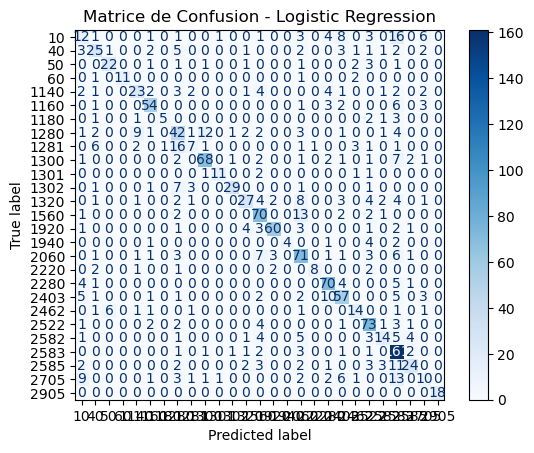


--- Linear SVC ---
Accuracy : 0.6573
Rapport de classification :
               precision    recall  f1-score   support

           0       0.19      0.12      0.15        57
           1       0.62      0.49      0.55        49
           2       0.73      0.58      0.64        33
           3       0.86      0.80      0.83        15
           4       0.57      0.58      0.58        48
           5       0.76      0.77      0.77        70
           6       0.64      0.54      0.58        13
           7       0.45      0.46      0.46        82
           8       0.37      0.25      0.30        40
           9       0.80      0.71      0.75        89
          10       0.75      0.75      0.75        16
          11       0.79      0.72      0.76        43
          12       0.56      0.53      0.55        60
          13       0.74      0.74      0.74        91
          14       0.84      0.87      0.85        76
          15       0.80      0.67      0.73        12
          16  

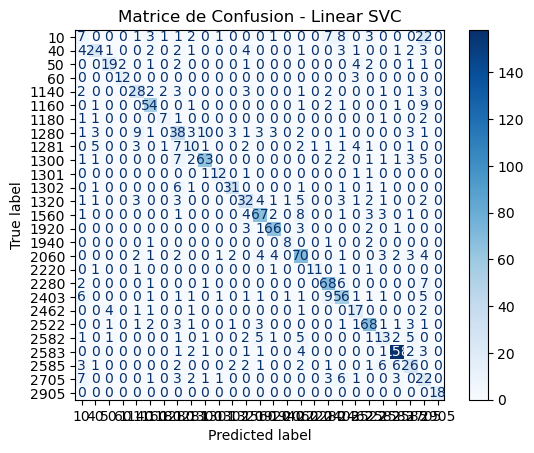


--- Random Forest ---
Accuracy : 0.6357
Rapport de classification :
               precision    recall  f1-score   support

           0       0.26      0.23      0.24        57
           1       0.50      0.47      0.48        49
           2       0.79      0.70      0.74        33
           3       1.00      0.80      0.89        15
           4       0.52      0.52      0.52        48
           5       0.78      0.71      0.75        70
           6       0.62      0.38      0.48        13
           7       0.47      0.44      0.46        82
           8       0.40      0.30      0.34        40
           9       0.74      0.75      0.75        89
          10       1.00      0.62      0.77        16
          11       0.71      0.67      0.69        43
          12       0.58      0.47      0.52        60
          13       0.69      0.67      0.68        91
          14       0.89      0.83      0.86        76
          15       0.80      0.67      0.73        12
          1

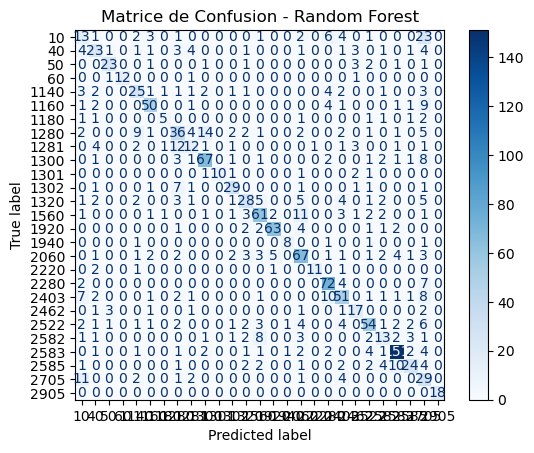


--- XGBoost ---


C:\Users\flore\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [09:34:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy : 0.6207
Rapport de classification :
               precision    recall  f1-score   support

           0       0.27      0.19      0.22        57
           1       0.55      0.37      0.44        49
           2       0.68      0.58      0.62        33
           3       1.00      0.67      0.80        15
           4       0.49      0.50      0.49        48
           5       0.84      0.74      0.79        70
           6       0.62      0.38      0.48        13
           7       0.48      0.46      0.47        82
           8       0.28      0.25      0.26        40
           9       0.81      0.71      0.75        89
          10       0.77      0.62      0.69        16
          11       0.76      0.72      0.74        43
          12       0.52      0.40      0.45        60
          13       0.64      0.69      0.67        91
          14       0.88      0.83      0.85        76
          15       0.67      0.67      0.67        12
          16       0.62      0.62 

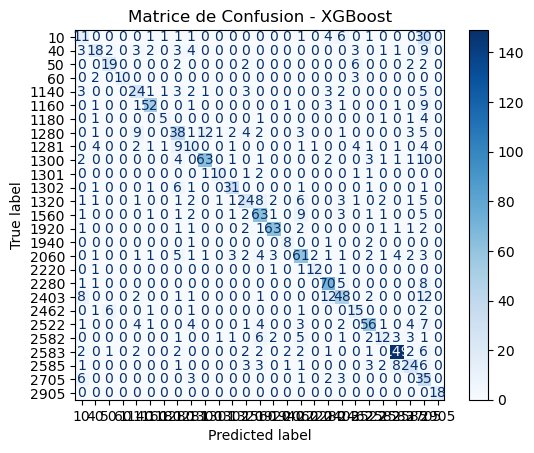

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Dictionnaire des modèles à tester
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Linear SVC": LinearSVC(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}

# Boucle pour tester chaque modèle
for name, model in models.items():
    print(f"\n--- {name} ---")
    
    # Entraînement du modèle
    model.fit(X_train_tfidf, y_train_encoded)
    
    # Prédiction sur les données de validation
    y_pred_encoded = model.predict(X_val_tfidf)
    
    # Calcul des métriques
    accuracy = accuracy_score(y_val_encoded, y_pred_encoded)
    print(f"Accuracy : {accuracy:.4f}")
    print("Rapport de classification :\n", classification_report(y_val_encoded, y_pred_encoded))
    
    # Matrice de confusion
    cm = confusion_matrix(y_val_encoded, y_pred_encoded)
    print("Matrice de confusion :\n", cm)
    
    # Affichage graphique de la matrice de confusion
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matrice de Confusion - {name}")
    plt.show()


## Seule la colonne designation est utilisée

In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Vectorisation TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limiter les dimensions pour éviter le surapprentissage

# Séparation train/test (facultatif si vous avez un test déjà défini)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Initialisation des modèles
models = {
    "SVM": SVC(kernel='linear', probability=True),
    "GradientBoosting": GradientBoostingClassifier(),
    "RandomForest": RandomForestClassifier(),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300),
    "SVD+SVM": Pipeline([
        ('tfidf', tfidf),
        ('svd', TruncatedSVD(n_components=100)),
        ('svm', SVC(kernel='linear', probability=True))
    ])
}

# Entraînement et évaluation
for name, model in models.items():
    if name != "SVD+SVM":
        pipeline = Pipeline([
            ('tfidf', tfidf),
            ('model', model)
        ])
    else:
        pipeline = model

    print(f"Training and evaluating model: {name}...")  # Print avant entraînement
    pipeline.fit(X_train_split, y_train_split)
    print(f"Training of {name} completed!")  # Print après entraînement

    y_pred = pipeline.predict(X_val_split)
    print(f"Evaluation of {name} completed!")  # Print après prédiction

    print(f"Model: {name}")
    print(classification_report(y_val_split, y_pred))
    print(f"Accuracy: {accuracy_score(y_val_split, y_pred)}")
    print("-" * 50)

# Prédictions sur X_test (par exemple avec le modèle préféré)
best_model = models['SVM']  # Exemple, remplacez par le modèle choisi
final_pipeline = Pipeline([
    ('tfidf', tfidf),
    ('model', best_model)
])
final_pipeline.fit(X_train['text'], Y_train.values.ravel())
X_test_preds = final_pipeline.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission.csv", index=False)


Training and evaluating model: SVM...
Training of SVM completed!
Evaluation of SVM completed!
Model: SVM
              precision    recall  f1-score   support

          10       0.41      0.52      0.46       612
          40       0.69      0.60      0.64       521
          50       0.78      0.83      0.81       357
          60       0.92      0.83      0.88       161
        1140       0.71      0.76      0.74       539
        1160       0.92      0.91      0.91       786
        1180       0.75      0.54      0.63       146
        1280       0.63      0.71      0.67       961
        1281       0.61      0.39      0.47       424
        1300       0.94      0.91      0.93       974
        1301       0.95      0.89      0.92       169
        1302       0.88      0.75      0.81       507
        1320       0.72      0.67      0.69       672
        1560       0.85      0.81      0.83      1013
        1920       0.90      0.93      0.92       841
        1940       0.82      0

## J'ai fusionner les colonnes designation et description

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('') + " " + X_train['description'].fillna('')
X_test['text'] = X_test['designation'].fillna('') + " " + X_test['description'].fillna('')

# Vectorisation TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limiter les dimensions pour éviter le surapprentissage

# Séparation train/test (facultatif si vous avez un test déjà défini)
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Initialisation des modèles
models = {
    "SVM": SVC(kernel='linear', probability=True),
    "GradientBoosting": GradientBoostingClassifier(),
    "RandomForest": RandomForestClassifier(),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300),
    "SVD+SVM": Pipeline([
        ('tfidf', tfidf),
        ('svd', TruncatedSVD(n_components=100)),
        ('svm', SVC(kernel='linear', probability=True))
    ])
}

# Entraînement et évaluation
for name, model in models.items():
    if name != "SVD+SVM":
        pipeline = Pipeline([
            ('tfidf', tfidf),
            ('model', model)
        ])
    else:
        pipeline = model

    print(f"Training and evaluating model: {name}...")  # Print avant entraînement
    pipeline.fit(X_train_split, y_train_split)
    print(f"Training of {name} completed!")  # Print après entraînement

    y_pred = pipeline.predict(X_val_split)
    print(f"Evaluation of {name} completed!")  # Print après prédiction

    print(f"Model: {name}")
    print(classification_report(y_val_split, y_pred))
    print(f"Accuracy: {accuracy_score(y_val_split, y_pred)}")
    print("-" * 50)

# Prédictions sur X_test (par exemple avec le modèle préféré)
best_model = models['SVM']  # Exemple, remplacez par le modèle choisi
final_pipeline = Pipeline([
    ('tfidf', tfidf),
    ('model', best_model)
])
final_pipeline.fit(X_train['text'], Y_train.values.ravel())
X_test_preds = final_pipeline.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission.csv", index=False)


Training and evaluating model: SVM...
Training of SVM completed!
Evaluation of SVM completed!
Model: SVM
              precision    recall  f1-score   support

          10       0.38      0.66      0.48       612
          40       0.65      0.55      0.59       521
          50       0.78      0.77      0.78       357
          60       0.93      0.88      0.90       161
        1140       0.71      0.73      0.72       539
        1160       0.88      0.87      0.88       786
        1180       0.70      0.39      0.50       146
        1280       0.65      0.65      0.65       961
        1281       0.65      0.44      0.53       424
        1300       0.87      0.88      0.88       974
        1301       0.95      0.84      0.89       169
        1302       0.83      0.73      0.77       507
        1320       0.74      0.70      0.72       672
        1560       0.81      0.81      0.81      1013
        1920       0.89      0.93      0.91       841
        1940       0.90      0

## Je dois rééquilibré les classes minoritaires avec smote pour avoir de meilleurs résultats sur celles-ci

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Séparation train/validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Transformation TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_split_tfidf = tfidf.fit_transform(X_train_split)
X_val_split_tfidf = tfidf.transform(X_val_split)

# Normalisation
scaler = StandardScaler(with_mean=False)
X_train_split_tfidf = scaler.fit_transform(X_train_split_tfidf)
X_val_split_tfidf = scaler.transform(X_val_split_tfidf)

# Analyse des classes avant oversampling
print("Distribution des classes avant oversampling :")
class_counts = Counter(y_train_split)
print(class_counts)

# Oversampling
target_size = 2000
sampling_strategy = {k: target_size for k, v in class_counts.items() if v < target_size}

oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train_split_tfidf, y_train_split)

print("Distribution des classes après oversampling :")
print(Counter(y_resampled))

# Entraînement des modèles
models = {
    "SVM": SVC(kernel='linear', probability=True),
    "GradientBoosting": GradientBoostingClassifier(),
    "RandomForest": RandomForestClassifier(),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300),
}

for name, model in models.items():
    print(f"Training and evaluating model: {name}...")
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_val_split_tfidf)
    
    print(f"Model: {name}")
    print(classification_report(y_val_split, y_pred))
    print(f"Accuracy: {accuracy_score(y_val_split, y_pred)}")
    print("-" * 50)

# Prédictions sur le jeu de test
X_test_tfidf = tfidf.transform(X_test['text'])
X_test_tfidf = scaler.transform(X_test_tfidf)

best_model = SVC(kernel='linear', probability=True)
best_model.fit(X_resampled, y_resampled)
X_test_preds = best_model.predict(X_test_tfidf)

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission2.csv", index=False)


Distribution des classes avant oversampling :
Counter({2583: 8162, 1300: 4071, 1560: 4060, 2522: 3998, 2060: 3964, 1280: 3909, 2280: 3818, 2403: 3788, 1920: 3462, 1160: 3167, 1320: 2569, 10: 2504, 2705: 2244, 1140: 2132, 2582: 2127, 40: 1987, 1302: 1984, 2585: 1971, 1281: 1646, 50: 1324, 2462: 1115, 2905: 683, 60: 671, 1940: 666, 2220: 654, 1301: 638, 1180: 618})
Distribution des classes après oversampling :
Counter({2583: 8162, 1300: 4071, 1560: 4060, 2522: 3998, 2060: 3964, 1280: 3909, 2280: 3818, 2403: 3788, 1920: 3462, 1160: 3167, 1320: 2569, 10: 2504, 2705: 2244, 1140: 2132, 2582: 2127, 1281: 2000, 1302: 2000, 1940: 2000, 40: 2000, 2585: 2000, 1180: 2000, 50: 2000, 60: 2000, 2905: 2000, 2462: 2000, 1301: 2000, 2220: 2000})
Training and evaluating model: SVM...
Model: SVM
              precision    recall  f1-score   support

          10       0.33      0.53      0.41       612
          40       0.51      0.60      0.55       521
          50       0.75      0.75      0.75       

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Séparation train/validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Transformation TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_split_tfidf = tfidf.fit_transform(X_train_split)
X_val_split_tfidf = tfidf.transform(X_val_split)

# Normalisation
scaler = StandardScaler(with_mean=False)
X_train_split_tfidf = scaler.fit_transform(X_train_split_tfidf)
X_val_split_tfidf = scaler.transform(X_val_split_tfidf)

# Analyse des classes avant oversampling
print("Distribution des classes avant oversampling :")
class_counts = Counter(y_train_split)
print(class_counts)

# Oversampling
target_size = 4000
sampling_strategy = {k: target_size for k, v in class_counts.items() if v < target_size}

oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train_split_tfidf, y_train_split)

print("Distribution des classes après oversampling :")
print(Counter(y_resampled))

# Entraînement des modèles
models = {
    "SVM": SVC(kernel='linear', probability=True),
    "GradientBoosting": GradientBoostingClassifier(),
    "RandomForest": RandomForestClassifier(),
    "NeuralNetwork": MLPClassifier(hidden_layer_sizes=(100,), max_iter=300),
}

for name, model in models.items():
    print(f"Training and evaluating model: {name}...")
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_val_split_tfidf)
    
    print(f"Model: {name}")
    print(classification_report(y_val_split, y_pred))
    print(f"Accuracy: {accuracy_score(y_val_split, y_pred)}")
    print("-" * 50)

# Prédictions sur le jeu de test
X_test_tfidf = tfidf.transform(X_test['text'])
X_test_tfidf = scaler.transform(X_test_tfidf)

best_model = SVC(kernel='linear', probability=True)
best_model.fit(X_resampled, y_resampled)
X_test_preds = best_model.predict(X_test_tfidf)

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission2.csv", index=False)


Distribution des classes avant oversampling :
Counter({2583: 8162, 1300: 4071, 1560: 4060, 2522: 3998, 2060: 3964, 1280: 3909, 2280: 3818, 2403: 3788, 1920: 3462, 1160: 3167, 1320: 2569, 10: 2504, 2705: 2244, 1140: 2132, 2582: 2127, 40: 1987, 1302: 1984, 2585: 1971, 1281: 1646, 50: 1324, 2462: 1115, 2905: 683, 60: 671, 1940: 666, 2220: 654, 1301: 638, 1180: 618})
Distribution des classes après oversampling :
Counter({2583: 8162, 1300: 4071, 1560: 4060, 1320: 4000, 1281: 4000, 2403: 4000, 1302: 4000, 10: 4000, 2705: 4000, 1280: 4000, 2060: 4000, 2522: 4000, 1920: 4000, 2582: 4000, 1940: 4000, 40: 4000, 1140: 4000, 2280: 4000, 2585: 4000, 1180: 4000, 50: 4000, 60: 4000, 1160: 4000, 2905: 4000, 2462: 4000, 1301: 4000, 2220: 4000})
Training and evaluating model: SVM...
Model: SVM
              precision    recall  f1-score   support

          10       0.33      0.51      0.40       612
          40       0.50      0.60      0.54       521
          50       0.74      0.75      0.74       

GridSearch sur SVM

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Vectorisation TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Limiter les dimensions pour éviter le surapprentissage

# Séparation train/test
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM
pipeline_svm = Pipeline([
    ('tfidf', tfidf),  # TF-IDF Vectorizer
    ('model', SVC(probability=True))  # SVM
])

# Définir les hyperparamètres à tester pour SVM
param_grid = {
    'model__C': [0.1, 1, 10],  # Régularisation
    'model__kernel': ['linear', 'rbf'],  # Noyau
    'model__gamma': ['scale', 'auto']  # Gamma pour les noyaux 'rbf'
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline_svm,
    param_grid=param_grid,
    scoring='accuracy',  # Métrique d'évaluation
    cv=3,  # Validation croisée avec 3 splits
    verbose=3,  # Affiche la progression
    n_jobs=4  # Utiliser tous les cœurs pour accélérer
)

# Entraîner GridSearchCV
print("Starting GridSearchCV for SVM...")
grid_search.fit(X_train_split, y_train_split)
print("GridSearchCV completed!")

# Meilleurs paramètres et performance
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_}")

# Évaluer le meilleur modèle sur les données de validation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_val_split)

print("Evaluation of the best model from GridSearchCV:")
print(classification_report(y_val_split, y_pred_best))
print(f"Accuracy on validation set: {accuracy_score(y_val_split, y_pred_best)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = best_model.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission.csv", index=False)
print("Submission file saved as 'submission.csv'.")

Starting GridSearchCV for SVM...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
GridSearchCV completed!
Best parameters: {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best cross-validated accuracy: 0.7900547606429958
Evaluation of the best model from GridSearchCV:
              precision    recall  f1-score   support

          10       0.42      0.53      0.47       612
          40       0.69      0.65      0.67       521
          50       0.82      0.83      0.82       357
          60       0.93      0.88      0.91       161
        1140       0.74      0.76      0.75       539
        1160       0.92      0.90      0.91       786
        1180       0.73      0.53      0.62       146
        1280       0.65      0.70      0.67       961
        1281       0.55      0.44      0.49       424
        1300       0.95      0.92      0.94       974
        1301       0.96      0.89      0.92       169
        1302       0.87      0.77      0.82       50

In [7]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__gamma,param_model__kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,488.459328,0.695220,43.220496,0.117377,0.1,scale,linear,"{'model__C': 0.1, 'model__gamma': 'scale', 'mo...",0.707561,0.711712,0.715068,0.711447,0.003071,7
1,800.545937,6.254994,58.578796,0.932496,0.1,scale,rbf,"{'model__C': 0.1, 'model__gamma': 'scale', 'mo...",0.617868,0.621092,0.623918,0.620959,0.002472,9
2,500.371638,3.996330,43.949543,0.335143,0.1,auto,linear,"{'model__C': 0.1, 'model__gamma': 'auto', 'mod...",0.707561,0.711712,0.715068,0.711447,0.003071,7
3,908.847052,2.016373,69.060882,0.138155,0.1,auto,rbf,"{'model__C': 0.1, 'model__gamma': 'auto', 'mod...",0.120164,0.120120,0.120164,0.120150,0.000021,11
4,301.987098,1.347720,35.921330,0.093553,1.0,scale,linear,"{'model__C': 1, 'model__gamma': 'scale', 'mode...",0.779809,0.781973,0.777601,0.779795,0.001785,3
5,630.599725,2.742017,51.686345,0.130831,1.0,scale,rbf,"{'model__C': 1, 'model__gamma': 'scale', 'mode...",0.785904,0.789392,0.786522,0.787273,0.001520,2
6,299.710693,2.813818,35.755930,0.185950,1.0,auto,linear,"{'model__C': 1, 'model__gamma': 'auto', 'model...",0.779809,0.781973,0.777601,0.779795,0.001785,3
7,926.132570,4.519814,67.086064,0.914244,1.0,auto,rbf,"{'model__C': 1, 'model__gamma': 'auto', 'model...",0.120164,0.120120,0.120164,0.120150,0.000021,11
8,273.872118,0.819450,36.089370,0.103941,10.0,scale,linear,"{'model__C': 10, 'model__gamma': 'scale', 'mod...",0.764088,0.763204,0.757772,0.761688,0.002792,5
9,696.886489,3.760672,52.717023,0.248626,10.0,scale,rbf,"{'model__C': 10, 'model__gamma': 'scale', 'mod...",0.789878,0.792749,0.787538,0.790055,0.002131,1


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Vectorisation TF-IDF
tfidf = TfidfVectorizer(max_features=10000)  # Limiter les dimensions pour éviter le surapprentissage

# Séparation train/test
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM
pipeline_svm = Pipeline([
    ('tfidf', tfidf),  # TF-IDF Vectorizer
    ('model', SVC(probability=True))  # SVM
])

# Définir les hyperparamètres à tester pour SVM
param_grid = {
    'model__C': [10],  # Conserver la meilleure valeur
    'model__kernel': ['rbf'],  # Conserver le noyau optimal
    'model__gamma': ['scale'],  # Conserver la meilleure valeur
}


# Initialiser GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline_svm,
    param_grid=param_grid,
    scoring='f1_weighted',  # Métrique d'évaluation
    cv=3,  # Validation croisée avec 3 splits
    verbose=3,  # Affiche la progression
    n_jobs=-1  # Utiliser tous les cœurs pour accélérer
)

# Entraîner GridSearchCV
print("Starting GridSearchCV for SVM...")
grid_search.fit(X_train_split, y_train_split)
print("GridSearchCV completed!")

# Meilleurs paramètres et performance
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_}")

# Évaluer le meilleur modèle sur les données de validation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_val_split)

print("Evaluation of the best model from GridSearchCV:")
print(classification_report(y_val_split, y_pred_best))
print(f"Accuracy on validation set: {accuracy_score(y_val_split, y_pred_best)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = best_model.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission.csv", index=False)
print("Submission file saved as 'submission.csv'.")

Starting GridSearchCV for SVM...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
GridSearchCV completed!
Best parameters: {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best cross-validated accuracy: 0.8015385676357635
Evaluation of the best model from GridSearchCV:
              precision    recall  f1-score   support

          10       0.45      0.56      0.50       612
          40       0.73      0.66      0.69       521
          50       0.82      0.83      0.83       357
          60       0.93      0.87      0.90       161
        1140       0.75      0.78      0.76       539
        1160       0.93      0.92      0.92       786
        1180       0.76      0.58      0.66       146
        1280       0.66      0.71      0.68       961
        1281       0.62      0.49      0.54       424
        1300       0.96      0.94      0.95       974
        1301       0.96      0.91      0.93       169
        1302       0.89      0.79      0.84       507


## max_features = 10000 améliore les résultats

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Séparation train/test
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM avec des paramètres fixes
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=15000)),  # TF-IDF Vectorizer
    ('model', SVC(C=10, kernel='rbf', gamma='scale', probability=True))  # SVM avec paramètres définis
])

# Entraîner le pipeline
print("Starting training of the SVM model...")
pipeline_svm.fit(X_train_split, y_train_split)
print("Training completed!")

# Évaluer le modèle sur les données de validation
y_pred_best = pipeline_svm.predict(X_val_split)

print("Evaluation of the model on validation set:")
print(classification_report(y_val_split, y_pred_best))
print(f"Accuracy on validation set: {accuracy_score(y_val_split, y_pred_best)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = pipeline_svm.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission3.csv", index=False)
print("Submission file saved as 'submission.csv'.")


Starting training of the SVM model...
Training completed!
Evaluation of the model on validation set:
              precision    recall  f1-score   support

          10       0.45      0.57      0.50       612
          40       0.73      0.66      0.70       521
          50       0.82      0.84      0.83       357
          60       0.94      0.86      0.90       161
        1140       0.75      0.78      0.76       539
        1160       0.93      0.92      0.93       786
        1180       0.75      0.59      0.66       146
        1280       0.64      0.71      0.67       961
        1281       0.63      0.48      0.54       424
        1300       0.97      0.94      0.95       974
        1301       0.97      0.90      0.93       169
        1302       0.91      0.78      0.84       507
        1320       0.80      0.74      0.77       672
        1560       0.84      0.84      0.84      1013
        1920       0.92      0.92      0.92       841
        1940       0.90      0.77 

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Séparation train/test
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM avec des paramètres fixes
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20000)),  # TF-IDF Vectorizer
    ('model', SVC(C=10, kernel='rbf', gamma='scale', probability=True, class_weight='balanced'))  # SVM
])

# Entraîner le pipeline
print("Starting training of the SVM model...")
pipeline_svm.fit(X_train_split, y_train_split)
print("Training completed!")

# Évaluer le modèle sur les données de validation
y_pred_best = pipeline_svm.predict(X_val_split)

print("Evaluation of the model on validation set:")
print(classification_report(y_val_split, y_pred_best, zero_division=0))
print(f"Accuracy on validation set: {accuracy_score(y_val_split, y_pred_best)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = pipeline_svm.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission3.csv", index=False)
print("Submission file saved as 'submission.csv'.")


Starting training of the SVM model...
Training completed!
Evaluation of the model on validation set:
              precision    recall  f1-score   support

          10       0.44      0.56      0.50       612
          40       0.74      0.65      0.69       521
          50       0.82      0.83      0.82       357
          60       0.93      0.86      0.89       161
        1140       0.75      0.79      0.77       539
        1160       0.93      0.92      0.92       786
        1180       0.75      0.58      0.66       146
        1280       0.64      0.70      0.67       961
        1281       0.59      0.49      0.54       424
        1300       0.96      0.94      0.95       974
        1301       0.96      0.91      0.93       169
        1302       0.91      0.78      0.84       507
        1320       0.80      0.75      0.77       672
        1560       0.85      0.85      0.85      1013
        1920       0.93      0.93      0.93       841
        1940       0.92      0.80 

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Séparation train/test
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM avec des paramètres fixes
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=25000)),  # TF-IDF Vectorizer
    ('model', SVC(C=10, kernel='rbf', gamma='scale', probability=True, class_weight='balanced'))  # SVM
])

# Entraîner le pipeline
print("Starting training of the SVM model...")
pipeline_svm.fit(X_train_split, y_train_split)
print("Training completed!")

# Évaluer le modèle sur les données de validation
y_pred_best = pipeline_svm.predict(X_val_split)

print("Evaluation of the model on validation set:")
print(classification_report(y_val_split, y_pred_best, zero_division=0))
print(f"Accuracy on validation set: {accuracy_score(y_val_split, y_pred_best)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = pipeline_svm.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission3.csv", index=False)
print("Submission file saved as 'submission.csv'.")


Starting training of the SVM model...
Training completed!
Evaluation of the model on validation set:
              precision    recall  f1-score   support

          10       0.44      0.57      0.50       612
          40       0.76      0.65      0.70       521
          50       0.82      0.83      0.82       357
          60       0.93      0.87      0.90       161
        1140       0.75      0.79      0.77       539
        1160       0.93      0.93      0.93       786
        1180       0.75      0.57      0.65       146
        1280       0.65      0.70      0.67       961
        1281       0.60      0.49      0.54       424
        1300       0.96      0.94      0.95       974
        1301       0.96      0.91      0.93       169
        1302       0.91      0.78      0.84       507
        1320       0.81      0.75      0.78       672
        1560       0.85      0.85      0.85      1013
        1920       0.93      0.92      0.92       841
        1940       0.92      0.79 

In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Vectorisation TF-IDF
tfidf = TfidfVectorizer(max_features=2000)  # Limiter les dimensions pour éviter le surapprentissage

# Séparation train/test
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM
pipeline_svm = Pipeline([
    ('tfidf', tfidf),  # TF-IDF Vectorizer
    ('model', SVC(probability=True))  # SVM
])

# Définir les hyperparamètres à tester pour SVM
param_grid = {
    'model__C': [8,10,15,20],  # Conserver la meilleure valeur
    'model__kernel': ['rbf'],  # Conserver le noyau optimal
    'model__gamma': ['scale'],  # Conserver la meilleure valeur
}


# Initialiser GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline_svm,
    param_grid=param_grid,
    scoring='f1_weighted',  # Métrique d'évaluation
    cv=2,  # Validation croisée avec 3 splits
    verbose=3,  # Affiche la progression
    n_jobs=-1  # Utiliser tous les cœurs pour accélérer
)

# Entraîner GridSearchCV
print("Starting GridSearchCV for SVM...")
grid_search.fit(X_train_split, y_train_split)
print("GridSearchCV completed!")

# Meilleurs paramètres et performance
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_}")

# Évaluer le meilleur modèle sur les données de validation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_val_split)

print("Evaluation of the best model from GridSearchCV:")
print(classification_report(y_val_split, y_pred_best))
print(f"Accuracy on validation set: {accuracy_score(y_val_split, y_pred_best)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = best_model.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission.csv", index=False)
print("Submission file saved as 'submission.csv'.")

Starting GridSearchCV for SVM...
Fitting 2 folds for each of 4 candidates, totalling 8 fits
GridSearchCV completed!
Best parameters: {'model__C': 8, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best cross-validated accuracy: 0.7549273297221959
Evaluation of the best model from GridSearchCV:
              precision    recall  f1-score   support

          10       0.37      0.51      0.43       612
          40       0.64      0.59      0.61       521
          50       0.80      0.80      0.80       357
          60       0.93      0.88      0.91       161
        1140       0.69      0.73      0.71       539
        1160       0.89      0.87      0.88       786
        1180       0.70      0.47      0.56       146
        1280       0.64      0.66      0.65       961
        1281       0.49      0.38      0.43       424
        1300       0.92      0.90      0.91       974
        1301       0.95      0.83      0.89       169
        1302       0.86      0.76      0.81       507
 

In [9]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__C,param_model__gamma,param_model__kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,316.611077,0.447592,57.619904,0.409445,8,scale,rbf,"{'model__C': 8, 'model__gamma': 'scale', 'mode...",0.756205,0.753649,0.754927,0.001278,1
1,316.490804,0.978910,57.412289,0.061547,10,scale,rbf,"{'model__C': 10, 'model__gamma': 'scale', 'mod...",0.756003,0.753744,0.754874,0.001129,2
2,317.135262,0.702658,57.518367,0.221961,15,scale,rbf,"{'model__C': 15, 'model__gamma': 'scale', 'mod...",0.755451,0.752876,0.754163,0.001288,3
3,316.503860,0.065255,57.504003,0.041998,20,scale,rbf,"{'model__C': 20, 'model__gamma': 'scale', 'mod...",0.754677,0.752636,0.753657,0.001020,4


In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Séparation train/test
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM avec des paramètres fixes
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=25000)),  # TF-IDF Vectorizer
    ('model', SVC(C=8, kernel='rbf', gamma='scale', probability=True, class_weight='balanced'))  # SVM
])

# Entraîner le pipeline
print("Starting training of the SVM model...")
pipeline_svm.fit(X_train_split, y_train_split)
print("Training completed!")

# Évaluer le modèle sur les données de validation
y_pred_best = pipeline_svm.predict(X_val_split)

print("Evaluation of the model on validation set:")
print(classification_report(y_val_split, y_pred_best, zero_division=0))
print(f"Accuracy on validation set: {accuracy_score(y_val_split, y_pred_best)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = pipeline_svm.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission3.csv", index=False)
print("Submission file saved as 'submission.csv'.")


Starting training of the SVM model...
Training completed!
Evaluation of the model on validation set:
              precision    recall  f1-score   support

          10       0.44      0.57      0.50       612
          40       0.76      0.65      0.70       521
          50       0.82      0.83      0.82       357
          60       0.93      0.87      0.90       161
        1140       0.75      0.79      0.77       539
        1160       0.93      0.93      0.93       786
        1180       0.75      0.57      0.65       146
        1280       0.65      0.70      0.67       961
        1281       0.60      0.49      0.54       424
        1300       0.96      0.94      0.95       974
        1301       0.96      0.91      0.93       169
        1302       0.91      0.78      0.84       507
        1320       0.81      0.75      0.78       672
        1560       0.85      0.85      0.85      1013
        1920       0.92      0.92      0.92       841
        1940       0.92      0.79 

# A tester ! C=8 moins bon que C=10 à priori, mais je dois tester sur un max_features plus haut

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Vectorisation TF-IDF
tfidf = TfidfVectorizer(max_features=25000)  # Limiter les dimensions pour éviter le surapprentissage

# Séparation train/test
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM
pipeline_svm = Pipeline([
    ('tfidf', tfidf),  # TF-IDF Vectorizer
    ('model', SVC(probability=True))  # SVM
])

# Définir les hyperparamètres à tester pour SVM
param_grid = {
    'model__C': [8,10,20,50,100],  # Conserver la meilleure valeur
    'model__kernel': ['rbf'],  # Conserver le noyau optimal
    'model__gamma': ['scale'],  # Conserver la meilleure valeur
}


# Initialiser GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline_svm,
    param_grid=param_grid,
    scoring='f1_weighted',  # Métrique d'évaluation
    cv=2,  # Validation croisée avec 3 splits
    verbose=3,  # Affiche la progression
    n_jobs=-1  # Utiliser tous les cœurs pour accélérer
)

# Entraîner GridSearchCV
print("Starting GridSearchCV for SVM...")
grid_search.fit(X_train_split, y_train_split)
print("GridSearchCV completed!")

# Meilleurs paramètres et performance
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_}")

# Évaluer le meilleur modèle sur les données de validation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_val_split)

print("Evaluation of the best model from GridSearchCV:")
print(classification_report(y_val_split, y_pred_best))
print(f"Accuracy on validation set: {accuracy_score(y_val_split, y_pred_best)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = best_model.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission.csv", index=False)
print("Submission file saved as 'submission.csv'.")

Starting GridSearchCV for SVM...
Fitting 2 folds for each of 5 candidates, totalling 10 fits


# A tester ! J'augmente encore le nombre de features pour voir si le résultat est meilleur !

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Séparation train/test
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM avec des paramètres fixes
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=30000)),  # TF-IDF Vectorizer
    ('model', SVC(C=10, kernel='rbf', gamma='scale', probability=True, class_weight='balanced'))  # SVM
])

# Entraîner le pipeline
print("Starting training of the SVM model...")
pipeline_svm.fit(X_train_split, y_train_split)
print("Training completed!")

# Évaluer le modèle sur les données de validation
y_pred_best = pipeline_svm.predict(X_val_split)

print("Evaluation of the model on validation set:")
print(classification_report(y_val_split, y_pred_best, zero_division=0))
print(f"Accuracy on validation set: {accuracy_score(y_val_split, y_pred_best)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = pipeline_svm.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission3.csv", index=False)
print("Submission file saved as 'submission.csv'.")


In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from joblib import parallel_backend

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Vectorisation TF-IDF
tfidf = TfidfVectorizer(max_features=25000)  # Limiter les dimensions pour éviter le surapprentissage

# Séparation train/test
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM
pipeline_svm = Pipeline([
    ('tfidf', tfidf),  # TF-IDF Vectorizer
    ('model', SVC(probability=True))  # SVM
])

# Définir les hyperparamètres à tester pour SVM
param_grid = {
    'model__C': [8, 10, 20, 50, 100],  # Conserver la meilleure valeur
    'model__kernel': ['rbf'],  # Conserver le noyau optimal
    'model__gamma': ['scale'],  # Conserver la meilleure valeur
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline_svm,
    param_grid=param_grid,
    scoring='f1_weighted',  # Métrique d'évaluation
    cv=2,  # Validation croisée avec 2 splits
    verbose=3,  # Affiche la progression
    n_jobs=-1  # Utiliser tous les cœurs pour accélérer
)

# Entraîner GridSearchCV avec gestion explicite du parallélisme
print("Starting GridSearchCV for SVM...")
with parallel_backend('loky', n_jobs=-1):  # Gestion du parallélisme
    grid_search.fit(X_train_split, y_train_split)
print("GridSearchCV completed!")

# Meilleurs paramètres et performance
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_}")

# Évaluer le meilleur modèle sur les données de validation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_val_split)

print("Evaluation of the best model from GridSearchCV:")
print(classification_report(y_val_split, y_pred_best))
print(f"Accuracy on validation set: {accuracy_score(y_val_split, y_pred_best)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = best_model.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission.csv", index=False)
print("Submission file saved as 'submission.csv'.")


Starting GridSearchCV for SVM...
Fitting 2 folds for each of 5 candidates, totalling 10 fits
GridSearchCV completed!
Best parameters: {'model__C': 20, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best cross-validated accuracy: 0.7931417965302736
Evaluation of the best model from GridSearchCV:
              precision    recall  f1-score   support

          10       0.44      0.57      0.50       612
          40       0.75      0.65      0.70       521
          50       0.82      0.83      0.83       357
          60       0.93      0.87      0.90       161
        1140       0.75      0.79      0.77       539
        1160       0.93      0.93      0.93       786
        1180       0.75      0.57      0.65       146
        1280       0.65      0.71      0.68       961
        1281       0.62      0.47      0.54       424
        1300       0.97      0.94      0.95       974
        1301       0.96      0.91      0.93       169
        1302       0.91      0.77      0.84       507

## C=20 best paramètre !

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Séparation train/test
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM avec des paramètres fixes
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=40000)),  # TF-IDF Vectorizer
    ('model', SVC(C=20, kernel='rbf', gamma='scale', probability=True, class_weight='balanced'))  # SVM
])

# Entraîner le pipeline
print("Starting training of the SVM model...")
pipeline_svm.fit(X_train_split, y_train_split)
print("Training completed!")

# Évaluer le modèle sur les données de validation
y_pred_best = pipeline_svm.predict(X_val_split)

print("Evaluation of the model on validation set:")
print(classification_report(y_val_split, y_pred_best, zero_division=0))
print(f"Accuracy on validation set: {accuracy_score(y_val_split, y_pred_best)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = pipeline_svm.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission3.csv", index=False)
print("Submission file saved as 'submission.csv'.")


Starting training of the SVM model...
Training completed!
Evaluation of the model on validation set:
              precision    recall  f1-score   support

          10       0.44      0.57      0.49       612
          40       0.76      0.66      0.71       521
          50       0.82      0.83      0.82       357
          60       0.93      0.87      0.90       161
        1140       0.75      0.80      0.77       539
        1160       0.93      0.93      0.93       786
        1180       0.76      0.55      0.64       146
        1280       0.65      0.70      0.67       961
        1281       0.60      0.49      0.54       424
        1300       0.97      0.94      0.95       974
        1301       0.97      0.91      0.94       169
        1302       0.92      0.78      0.84       507
        1320       0.81      0.75      0.78       672
        1560       0.85      0.84      0.84      1013
        1920       0.92      0.93      0.92       841
        1940       0.90      0.80 

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Séparation train/test
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline LinearSVC
pipeline_linear_svc = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=100000)),  # TF-IDF Vectorizer
    ('model', LinearSVC(C=20, class_weight='balanced', max_iter=10000))  # LinearSVC
])

# Entraîner le pipeline
print("Starting training of the LinearSVC model...")
pipeline_linear_svc.fit(X_train_split, y_train_split)
print("Training completed!")

# Évaluer le modèle sur les données de validation
y_pred_best = pipeline_linear_svc.predict(X_val_split)

print("Evaluation of the model on validation set:")
print(classification_report(y_val_split, y_pred_best, zero_division=0))
print(f"Accuracy on validation set: {accuracy_score(y_val_split, y_pred_best)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = pipeline_linear_svc.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission_linear_svc.csv", index=False)
print("Submission file saved as 'submission_linear_svc.csv'.")


Starting training of the LinearSVC model...
Training completed!
Evaluation of the model on validation set:
              precision    recall  f1-score   support

          10       0.45      0.45      0.45       612
          40       0.67      0.64      0.65       521
          50       0.75      0.79      0.77       357
          60       0.87      0.88      0.87       161
        1140       0.71      0.75      0.73       539
        1160       0.91      0.93      0.92       786
        1180       0.66      0.64      0.65       146
        1280       0.64      0.59      0.62       961
        1281       0.49      0.49      0.49       424
        1300       0.95      0.94      0.95       974
        1301       0.92      0.92      0.92       169
        1302       0.80      0.78      0.79       507
        1320       0.76      0.71      0.73       672
        1560       0.80      0.80      0.80      1013
        1920       0.89      0.90      0.90       841
        1940       0.83     

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Séparation train/test
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM avec des paramètres fixes
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=60000)),  # TF-IDF Vectorizer
    ('model', SVC(C=20, kernel='rbf', gamma='scale', probability=True, class_weight='balanced'))  # SVM
])

# Entraîner le pipeline
print("Starting training of the SVM model...")
pipeline_svm.fit(X_train_split, y_train_split)
print("Training completed!")

# Évaluer le modèle sur les données de validation
y_pred_best = pipeline_svm.predict(X_val_split)

print("Evaluation of the model on validation set:")
print(classification_report(y_val_split, y_pred_best, zero_division=0))
print(f"Accuracy on validation set: {accuracy_score(y_val_split, y_pred_best)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = pipeline_svm.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission3.csv", index=False)
print("Submission file saved as 'submission.csv'.")


Starting training of the SVM model...
Training completed!
Evaluation of the model on validation set:
              precision    recall  f1-score   support

          10       0.43      0.57      0.49       612
          40       0.77      0.65      0.71       521
          50       0.83      0.82      0.82       357
          60       0.94      0.87      0.90       161
        1140       0.75      0.80      0.78       539
        1160       0.93      0.92      0.93       786
        1180       0.78      0.55      0.64       146
        1280       0.65      0.69      0.67       961
        1281       0.61      0.49      0.54       424
        1300       0.97      0.94      0.95       974
        1301       0.97      0.90      0.93       169
        1302       0.92      0.77      0.84       507
        1320       0.81      0.75      0.78       672
        1560       0.84      0.85      0.84      1013
        1920       0.93      0.92      0.92       841
        1940       0.91      0.79 

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Séparation train/test
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM avec des paramètres fixes
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=45000)),  # TF-IDF Vectorizer
    ('model', SVC(C=20, kernel='rbf', gamma='scale', probability=True, class_weight='balanced'))  # SVM
])

# Entraîner le pipeline
print("Starting training of the SVM model...")
pipeline_svm.fit(X_train_split, y_train_split)
print("Training completed!")

# Évaluer le modèle sur les données de validation
y_pred_best = pipeline_svm.predict(X_val_split)

print("Evaluation of the model on validation set:")
print(classification_report(y_val_split, y_pred_best, zero_division=0))
print(f"Accuracy on validation set: {accuracy_score(y_val_split, y_pred_best)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = pipeline_svm.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission3.csv", index=False)
print("Submission file saved as 'submission.csv'.")


Starting training of the SVM model...
Training completed!
Evaluation of the model on validation set:
              precision    recall  f1-score   support

          10       0.44      0.57      0.50       612
          40       0.76      0.66      0.71       521
          50       0.83      0.83      0.83       357
          60       0.93      0.87      0.90       161
        1140       0.76      0.80      0.78       539
        1160       0.93      0.93      0.93       786
        1180       0.77      0.55      0.64       146
        1280       0.65      0.70      0.67       961
        1281       0.60      0.49      0.54       424
        1300       0.97      0.94      0.95       974
        1301       0.97      0.91      0.94       169
        1302       0.92      0.78      0.84       507
        1320       0.81      0.75      0.78       672
        1560       0.84      0.84      0.84      1013
        1920       0.92      0.92      0.92       841
        1940       0.90      0.80 

 ## BEST
 ('tfidf', TfidfVectorizer(max_features=45000)),  # TF-IDF Vectorizer
    ('model', SVC(C=20, kernel='rbf', gamma='scale', probability=True, class_weight='balanced'))  # SVM

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from joblib import parallel_backend

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Vectorisation TF-IDF
tfidf = TfidfVectorizer(max_features=45000)  # Limiter les dimensions pour éviter le surapprentissage

# Séparation train/test
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train['text'], Y_train.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM
pipeline_svm = Pipeline([
    ('tfidf', tfidf),  # TF-IDF Vectorizer
    ('model', SVC(probability=True))  # SVM
])

# Définir les hyperparamètres à tester pour SVM
param_grid = {
    'model__C': [9, 12, 15, 17],  # Conserver la meilleure valeur
    'model__kernel': ['rbf'],  # Conserver le noyau optimal
    'model__gamma': ['scale'],  # Conserver la meilleure valeur
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline_svm,
    param_grid=param_grid,
    scoring='f1_weighted',  # Métrique d'évaluation
    cv=2,  # Validation croisée avec 2 splits
    verbose=3,  # Affiche la progression
    n_jobs=-1  # Utiliser tous les cœurs pour accélérer
)

# Entraîner GridSearchCV avec gestion explicite du parallélisme
print("Starting GridSearchCV for SVM...")
with parallel_backend('loky', n_jobs=-1):  # Gestion du parallélisme
    grid_search.fit(X_train_split, y_train_split)
print("GridSearchCV completed!")

# Meilleurs paramètres et performance
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validated accuracy: {grid_search.best_score_}")

# Évaluer le meilleur modèle sur les données de validation
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_val_split)

print("Evaluation of the best model from GridSearchCV:")
print(classification_report(y_val_split, y_pred_best))
print(f"Accuracy on validation set: {accuracy_score(y_val_split, y_pred_best)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = best_model.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission.csv", index=False)
print("Submission file saved as 'submission.csv'.")


Starting GridSearchCV for SVM...
Fitting 2 folds for each of 4 candidates, totalling 8 fits
GridSearchCV completed!
Best parameters: {'model__C': 12, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
Best cross-validated accuracy: 0.7919902373832638
Evaluation of the best model from GridSearchCV:
              precision    recall  f1-score   support

          10       0.44      0.57      0.49       612
          40       0.76      0.66      0.71       521
          50       0.83      0.83      0.83       357
          60       0.93      0.87      0.90       161
        1140       0.76      0.80      0.78       539
        1160       0.93      0.93      0.93       786
        1180       0.77      0.55      0.64       146
        1280       0.65      0.72      0.68       961
        1281       0.63      0.46      0.54       424
        1300       0.97      0.94      0.95       974
        1301       0.97      0.91      0.94       169
        1302       0.92      0.78      0.84       507


In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('')
X_test['text'] = X_test['designation'].fillna('')

# Séparer 10% des données pour une validation finale
X_train_main, X_val_final, y_train_main, y_val_final = train_test_split(
    X_train, Y_train, test_size=0.1, random_state=42
)

# Séparer les 90% restants en train/validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_main['text'], y_train_main.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM avec des paramètres fixes
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=45000)),  # TF-IDF Vectorizer
    ('model', SVC(C=12, kernel='rbf', gamma='scale', probability=True, class_weight='balanced'))  # SVM
])

# Entraîner le pipeline
print("Starting training of the SVM model...")
pipeline_svm.fit(X_train_split, y_train_split)
print("Training completed!")

# Évaluer le modèle sur les données de validation intermédiaire
y_pred_val = pipeline_svm.predict(X_val_split)

print("Evaluation of the model on intermediate validation set:")
print(classification_report(y_val_split, y_pred_val, zero_division=0))
print(f"Accuracy on intermediate validation set: {accuracy_score(y_val_split, y_pred_val)}")

# Évaluer le modèle sur les données de validation finale
y_pred_final = pipeline_svm.predict(X_val_final['text'])

print("Evaluation of the model on final validation set:")
print(classification_report(y_val_final.values.ravel(), y_pred_final, zero_division=0))
print(f"Accuracy on final validation set: {accuracy_score(y_val_final.values.ravel(), y_pred_final)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = pipeline_svm.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission3.csv", index=False)
print("Submission file saved as 'submission3.csv'.")


Starting training of the SVM model...
Training completed!
Evaluation of the model on intermediate validation set:
              precision    recall  f1-score   support

          10       0.45      0.53      0.49       565
          40       0.73      0.70      0.71       410
          50       0.84      0.83      0.84       293
          60       0.93      0.86      0.90       148
        1140       0.75      0.76      0.75       496
        1160       0.94      0.93      0.94       693
        1180       0.90      0.53      0.67       144
        1280       0.67      0.72      0.69       913
        1281       0.62      0.53      0.57       374
        1300       0.98      0.94      0.96       915
        1301       0.98      0.90      0.94       137
        1302       0.88      0.82      0.85       419
        1320       0.83      0.76      0.80       591
        1560       0.82      0.85      0.83       896
        1920       0.92      0.92      0.92       791
        1940       0.

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('') + " " + X_train['description'].fillna('')
X_test['text'] = X_test['designation'].fillna('') + " " + X_test['description'].fillna('')

# Séparer 10% des données pour une validation finale
X_train_main, X_val_final, y_train_main, y_val_final = train_test_split(
    X_train, Y_train, test_size=0.1, random_state=42
)

# Séparer les 90% restants en train/validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_main['text'], y_train_main.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM avec des paramètres fixes
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=45000)),  # TF-IDF Vectorizer
    ('model', SVC(C=12, kernel='rbf', gamma='scale', probability=True, class_weight='balanced'))  # SVM
])

# Entraîner le pipeline
print("Starting training of the SVM model...")
pipeline_svm.fit(X_train_split, y_train_split)
print("Training completed!")

# Évaluer le modèle sur les données de validation intermédiaire
y_pred_val = pipeline_svm.predict(X_val_split)

print("Evaluation of the model on intermediate validation set:")
print(classification_report(y_val_split, y_pred_val, zero_division=0))
print(f"Accuracy on intermediate validation set: {accuracy_score(y_val_split, y_pred_val)}")

# Évaluer le modèle sur les données de validation finale
y_pred_final = pipeline_svm.predict(X_val_final['text'])

print("Evaluation of the model on final validation set:")
print(classification_report(y_val_final.values.ravel(), y_pred_final, zero_division=0))
print(f"Accuracy on final validation set: {accuracy_score(y_val_final.values.ravel(), y_pred_final)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = pipeline_svm.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission3.csv", index=False)
print("Submission file saved as 'submission3.csv'.")


Starting training of the SVM model...
Training completed!
Evaluation of the model on intermediate validation set:
              precision    recall  f1-score   support

          10       0.45      0.68      0.54       565
          40       0.73      0.70      0.72       410
          50       0.85      0.82      0.83       293
          60       0.95      0.86      0.90       148
        1140       0.80      0.81      0.81       496
        1160       0.95      0.94      0.94       693
        1180       0.91      0.55      0.68       144
        1280       0.70      0.70      0.70       913
        1281       0.69      0.60      0.64       374
        1300       0.94      0.91      0.93       915
        1301       0.98      0.94      0.96       137
        1302       0.84      0.81      0.83       419
        1320       0.87      0.82      0.84       591
        1560       0.83      0.86      0.84       896
        1920       0.91      0.92      0.92       791
        1940       0.

# Celui là est le meilleur modèle, pas de smote, on fusionne données designation et description

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('') + " " + X_train['description'].fillna('')
X_test['text'] = X_test['designation'].fillna('') + " " + X_test['description'].fillna('')

# Séparer 10% des données pour une validation finale
X_train_main, X_val_final, y_train_main, y_val_final = train_test_split(
    X_train, Y_train, test_size=0.1, random_state=42
)

# Séparer les 90% restants en train/validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_main['text'], y_train_main.values.ravel(), test_size=0.2, random_state=42
)

# TF-IDF Vectorization (separately applied)
tfidf = TfidfVectorizer(max_features=45000)

# Convertir les textes en vecteurs TF-IDF
X_train_tfidf = tfidf.fit_transform(X_train_split)
X_val_tfidf = tfidf.transform(X_val_split)
X_test_tfidf = tfidf.transform(X_test['text'])

# Appliquer SMOTE
print("Applying SMOTE to balance the classes...")
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train_split)
print("SMOTE completed. Number of samples after balancing:", X_train_balanced.shape[0])

# Entraîner le modèle SVM
print("Training the SVM model...")
svm_model = SVC(C=12, kernel='rbf', gamma='scale', probability=True, class_weight=None)
svm_model.fit(X_train_balanced, y_train_balanced)
print("Training completed!")

# Évaluer le modèle sur les données de validation intermédiaire
y_pred_val = svm_model.predict(X_val_tfidf)

print("Evaluation of the model on intermediate validation set:")
print(classification_report(y_val_split, y_pred_val, zero_division=0))
print(f"Accuracy on intermediate validation set: {accuracy_score(y_val_split, y_pred_val)}")

# Évaluer le modèle sur les données de validation finale
X_val_final_tfidf = tfidf.transform(X_val_final['text'])
y_pred_final = svm_model.predict(X_val_final_tfidf)

print("Evaluation of the model on final validation set:")
print(classification_report(y_val_final.values.ravel(), y_pred_final, zero_division=0))
print(f"Accuracy on final validation set: {accuracy_score(y_val_final.values.ravel(), y_pred_final)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = svm_model.predict(X_test_tfidf)

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission_smote_before_tfidf.csv", index=False)
print("Submission file saved as 'submission_smote_before_tfidf.csv'.")


Applying SMOTE to balance the classes...
SMOTE completed. Number of samples after balancing: 199422
Training the SVM model...
Training completed!
Evaluation of the model on intermediate validation set:
              precision    recall  f1-score   support

          10       0.42      0.68      0.52       565
          40       0.73      0.70      0.72       410
          50       0.85      0.82      0.84       293
          60       0.96      0.83      0.89       148
        1140       0.80      0.79      0.80       496
        1160       0.94      0.93      0.94       693
        1180       0.91      0.54      0.68       144
        1280       0.68      0.71      0.70       913
        1281       0.71      0.56      0.62       374
        1300       0.96      0.92      0.94       915
        1301       0.99      0.92      0.95       137
        1302       0.84      0.80      0.82       419
        1320       0.87      0.81      0.84       591
        1560       0.83      0.86      0.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('') + " " + X_train['description'].fillna('')
X_test['text'] = X_test['designation'].fillna('') + " " + X_test['description'].fillna('')

# Séparer 10% des données pour une validation finale
X_train_main, X_val_final, y_train_main, y_val_final = train_test_split(
    X_train, Y_train, test_size=0.1, random_state=42
)

# Séparer les 90% restants en train/validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_main['text'], y_train_main.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM avec SMOTE
pipeline_svm = ImbPipeline([
    ('tfidf', TfidfVectorizer(max_features=45000)),  # TF-IDF Vectorizer
    ('smote', SMOTE(random_state=42)),  # SMOTE for balancing classes
    ('model', SVC(C=12, kernel='rbf', gamma='scale', probability=True, class_weight=None))  # SVM
])

# Entraîner le pipeline
print("Starting training of the SVM model with SMOTE...")
pipeline_svm.fit(X_train_split, y_train_split)
print("Training completed!")

# Évaluer le modèle sur les données de validation intermédiaire
y_pred_val = pipeline_svm.predict(X_val_split)

print("Evaluation of the model on intermediate validation set:")
print(classification_report(y_val_split, y_pred_val, zero_division=0))
print(f"Accuracy on intermediate validation set: {accuracy_score(y_val_split, y_pred_val)}")

# Évaluer le modèle sur les données de validation finale
y_pred_final = pipeline_svm.predict(X_val_final['text'])

print("Evaluation of the model on final validation set:")
print(classification_report(y_val_final.values.ravel(), y_pred_final, zero_division=0))
print(f"Accuracy on final validation set: {accuracy_score(y_val_final.values.ravel(), y_pred_final)}")

# Prédictions sur X_test
print("Making predictions on X_test...")
X_test_preds = pipeline_svm.predict(X_test['text'])

# Sauvegarde des prédictions
submission = pd.DataFrame({
    "productid": X_test['productid'],
    "predicted_category": X_test_preds
})
submission.to_csv("submission_with_smote.csv", index=False)
print("Submission file saved as 'submission_with_smote.csv'.")


# SMOTE baisse les perfs

# Meilleur essai avec transfo en pickle du modèle !

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
import joblib  # Import pour sauvegarder le modèle

# Chargement des données
X_train = pd.read_csv("../data/X_train_update.csv", index_col=0)
Y_train = pd.read_csv("../data/Y_train_CVw08PX.csv", index_col=0)
X_test = pd.read_csv("../data/X_test_update.csv", index_col=0)

# Fusion des colonnes textuelles
X_train['text'] = X_train['designation'].fillna('') + " " + X_train['description'].fillna('')
X_test['text'] = X_test['designation'].fillna('') + " " + X_test['description'].fillna('')

# Séparer 10% des données pour une validation finale
X_train_main, X_val_final, y_train_main, y_val_final = train_test_split(
    X_train, Y_train, test_size=0.1, random_state=42
)

# Séparer les 90% restants en train/validation
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_main['text'], y_train_main.values.ravel(), test_size=0.2, random_state=42
)

# Définir le pipeline SVM avec des paramètres fixes
pipeline_svm = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=45000)),  # TF-IDF Vectorizer
    ('model', SVC(C=12, kernel='rbf', gamma='scale', probability=True, class_weight='balanced'))  # SVM
])

# Entraîner le pipeline
print("Starting training of the SVM model...")
pipeline_svm.fit(X_train_split, y_train_split)
print("Training completed!")

# Évaluer le modèle sur les données de validation intermédiaire
y_pred_val = pipeline_svm.predict(X_val_split)

print("Evaluation of the model on intermediate validation set:")
print(classification_report(y_val_split, y_pred_val, zero_division=0))
print(f"Accuracy on intermediate validation set: {accuracy_score(y_val_split, y_pred_val)}")

# Évaluer le modèle sur les données de validation finale
y_pred_final = pipeline_svm.predict(X_val_final['text'])

print("Evaluation of the model on final validation set:")
print(classification_report(y_val_final.values.ravel(), y_pred_final, zero_division=0))
print(f"Accuracy on final validation set: {accuracy_score(y_val_final.values.ravel(), y_pred_final)}")

# Sauvegarde du modèle entraîné en pickle
print("Saving the trained model as a pickle file...")
joblib.dump(pipeline_svm, "svm_model.pkl")  # Sauvegarde du pipeline complet
print("Model saved as 'svm_model.pkl'.")


Starting training of the SVM model...
Training completed!
Evaluation of the model on intermediate validation set:
              precision    recall  f1-score   support

          10       0.45      0.68      0.54       565
          40       0.73      0.70      0.72       410
          50       0.85      0.82      0.83       293
          60       0.95      0.86      0.90       148
        1140       0.80      0.81      0.81       496
        1160       0.95      0.94      0.94       693
        1180       0.91      0.55      0.68       144
        1280       0.70      0.70      0.70       913
        1281       0.69      0.60      0.64       374
        1300       0.94      0.91      0.93       915
        1301       0.98      0.94      0.96       137
        1302       0.84      0.81      0.83       419
        1320       0.87      0.82      0.84       591
        1560       0.83      0.86      0.84       896
        1920       0.91      0.92      0.92       791
        1940       0.